## Perceptron

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    temp = (x1*w1) + (x2*w2)

    if temp <= theta:
        return 0
    elif temp > theta:
        return 1

In [2]:
AND(0, 0) # 0
AND(1, 0) # 0
AND(0, 1) # 0
AND(1, 1) # 1

1

## Neural Network

### Activation function

#### step function(계단함수)

계단함수란:
- f(x)의 output이 discrete한 것 (0 or 1)

In [13]:
import numpy as np

def step_func(x):
    y = x > 0
    return y.astype(np.int32)


In [8]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [9]:
y = x > 0
y

array([False,  True,  True])

In [10]:
y = y.astype(np.int32)
y

array([0, 1, 1])

- 아래 그래프에서 보듯 계단형식이기 때문에 step function(계단함수)이라고 함

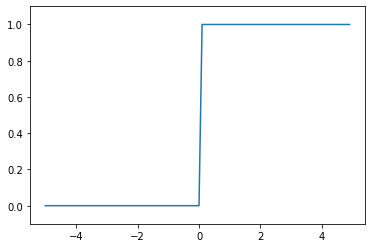

In [24]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### sigmoid function(시그모이드 함수)

시그모이드 함수 수식: $h(x) = \frac{1}{1+exp(-x)}$

시그모이드 함수:
- returns 0 - 1
- 보통 양수(+)면 1, 음수(-)면 0

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

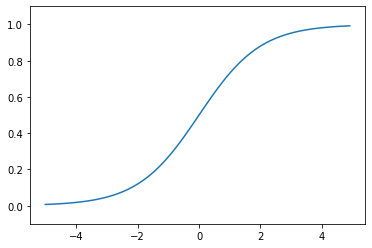

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

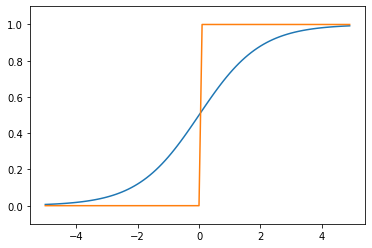

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_func(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

#### 기타 활성화 함수
- ReLU: 
    - x >= 0: 입력 그대로 출력
    - x < 0: 0 출력

- LeakyReLU:
    - ReLU의 단점 보완

### 행렬 곱

In [28]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

np.dot(a, b)

array([[19, 22],
       [43, 50]])

In [29]:
a.dot(b)

array([[19, 22],
       [43, 50]])

### 행렬 곱 사용해 신경망 구현

In [30]:
x = np.array([1, 2])
w = np.array([[1, 3, 5], [2, 4, 6]])

y = x.dot(w)
y

array([ 5, 11, 17])

In [31]:
x = np.array([1.0, 0.5])
w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])

a1 = np.dot(x, w1) + b1
a1

array([0.3, 0.7, 1.1])

In [32]:
# a1 goes through activation function(sigmoid) and becomes z1
z1 = sigmoid(a1)
z1

array([0.57444252, 0.66818777, 0.75026011])

In [33]:
w2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

# z1 is now == input of a2
a2 = z1.dot(w2) + b2
z2 = sigmoid(a2)
z2

array([0.62624937, 0.7710107 ])

In [34]:
def identity_func(x):
    return x

w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

a3 = z2.dot(w3) + b3
y = identity_func(a3) # i.e. y = a3
y

array([0.31682708, 0.69627909])

#### 구현 정리

In [35]:
def init_network():
    nw = {}

    nw['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    nw['b1'] = np.array([0.1, 0.2, 0.3])

    nw['w2'] = np.array([[0.1, 0.4],
                         [0.2, 0.5],
                         [0.3, 0.6]])
    nw['b2'] = np.array([0.1, 0.2])

    nw['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    nw['b3'] = np.array([0.1, 0.2])

    return nw


def forward(nw, x):
    w1, w2, w3 = nw['w1'], nw['w2'], nw['w3']
    b1, b2, b3 = nw['b1'], nw['b2'], nw['b3']

    a1 = x.dot(w1) + b1
    z1 = sigmoid(a1)

    a2 = z1.dot(w2) + b2
    z2 = sigmoid(a2)

    a3 = z2.dot(w3) + b3
    y = identity_func(a3)

    return y

In [36]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(nw=network, x=x)
y

array([0.31682708, 0.69627909])

#### 출력 정리

In [37]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [38]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

softmax function 구현 시 주의점
- e^100은 아주 큰 값이기 때문에 inf를 return함
- 즉, 불안정한 계산 결과를 돌려줌

In [39]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 문제 해결책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [40]:
a = np.array([1010, 1000, 990])
y = softmax(a)
y

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [41]:
np.sum(y)

1.0

#### 출력층의 뉴런 수 정하기

분류문제
- 분류하고 싶은 '클래스 수'로 output 개수 설정
    - e.g) 숫자 0-9 분류: 출력층의 뉴런 수 = 10

#### MNIST 손글씨 숫자 인식

In [64]:
import os, sys
sys.path.append(os.pardir) # 부모 디렉터리의 파일 가져올 수 있도록 설정
from data.mnist import load_mnist
from PIL import Image
import pickle

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [43]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = y_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지 모양인 28x28로 변환
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [55]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, y_test


def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        nw = pickle.load(f)

    return nw


def predict(nw, x):
    w1, w2, w3 = nw['W1'], nw['W2'], nw['W3']
    b1, b2, b3 = nw['b1'], nw['b2'], nw['b3']

    a1 = x.dot(w1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(w2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(w3) + b3
    y = softmax(a3)

    return y

In [62]:
# x: img in array
# t: img labels
x, t = get_data()
network = init_network()
acc_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    print(f'y: {y}')
    p = np.argmax(y) # np.argmax 역할: 가장 큰 값의 인덱스 반환
    print(f'p: {p}\n')
    if p == t[i]:
        acc_cnt += 1

print(f'ACC: {float(acc_cnt) / len(x)}')

y: [8.4412568e-05 2.6350656e-06 7.1549485e-04 1.2586274e-03 1.1727965e-06
 4.4990851e-05 1.6269318e-08 9.9706501e-01 9.3744884e-06 8.1831199e-04]
p: 7

y: [4.8363330e-03 1.1045863e-03 9.4425237e-01 1.4309139e-02 5.6989620e-07
 6.6760494e-03 2.7533356e-02 1.2708448e-06 1.2864238e-03 4.7864720e-08]
p: 2

y: [1.0358299e-07 9.8897260e-01 4.2894878e-03 1.7832081e-03 1.3173347e-04
 7.5940700e-04 4.6890948e-04 2.2699712e-03 1.2378684e-03 8.6714514e-05]
p: 1

y: [9.9411470e-01 8.2114859e-08 1.5906469e-03 1.8977541e-04 4.3212358e-06
 3.3714003e-03 4.0662949e-04 2.3197041e-04 4.8360318e-05 4.2039297e-05]
p: 0

y: [2.0664294e-04 6.5651075e-06 2.8900336e-03 3.3272045e-05 9.5477366e-01
 4.8161991e-04 2.0392602e-03 5.4869517e-03 1.4368899e-03 3.2645270e-02]
p: 4

y: [3.0314215e-08 9.8850071e-01 1.7312489e-03 2.2392001e-03 8.4456406e-05
 2.9864087e-04 3.4739434e-05 4.7724475e-03 1.9128998e-03 4.2563016e-04]
p: 1

y: [3.8058201e-06 4.5063342e-05 2.0019805e-05 1.4376781e-04 9.7458696e-01
 8.6942585e-03

#### 배치 처리

batch의 의미:
- dataset을 작은 단위(batch size)로 쪼개서 분석하는 것

In [67]:
batch_size = 100
acc_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    print(f'x batch: {x_batch}')
    y_batch = predict(network, x_batch)
    print(f'y batch: {y_batch}\n')

    p = np.argmax(y_batch, axis=1)
    acc_cnt += np.sum(p == t[i:i+batch_size])

print(f'ACC: {float(acc_cnt) / len(x)}')

x batch: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y batch: [[3.29137470e-06 1.02745219e-07 2.78982352e-05 4.90758248e-05
  4.57290810e-08 1.75426351e-06 6.34365505e-10 3.88771221e-02
  3.65525580e-07 3.19072278e-05]
 [2.38913271e-05 5.45662215e-06 4.66457568e-03 7.06867431e-05
  2.81527135e-09 3.29794311e-05 1.36014030e-04 6.27792529e-09
  6.35489414e-06 2.36450803e-10]
 [4.35422504e-10 4.15724935e-03 1.80313509e-05 7.49591163e-06
  5.53756138e-07 3.19225251e-06 1.97111353e-06 9.54208281e-06
  5.20351841e-06 3.64513966e-07]
 [1.26391882e-02 1.04401043e-09 2.02235260e-05 2.41280941e-06
  5.49403509e-08 4.28640706e-05 5.16990303e-06 2.94927781e-06
  6.14853718e-07 5.34488208e-07]
 [3.63746892e-07 1.15563239e-08 5.08722769e-06 5.85677604e-08
  1.68065785e-03 8.47779859e-07 3.58964212e-06 9.65850268e-06
  2.52930954e-06 5.74644619e-05]
 [1.77338186e-10 5.78273041e-03 1.0127798